<a href="https://colab.research.google.com/github/MafraDeborita/trilhas-IVdesafio/blob/main/conclu%C3%ADdo_deboraMafra_desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Debora Mafra

DESAFIO PROPOSTO

O gerente te apresentou uma planilha da situação atual dos clientes do banco em alguns estados do nordeste. Mas, como um bom cientista de dados sabe, nem tudo são flores. Os dados, como petróleo bruto, precisam ser refinados para procedimentos posteriores! Nesse contexto, você, como analista contratado, tem a função de interpretar e apresentar insights para o gerente.

**🫡Sua missão :**

<aside>
🛠 Utilizando suas habilidades ninja em Python e bibliotecas como Pandas e Seaborn, você deve aplicá-las para:

</aside>

1. Substituir o cabeçalho por palavras em letras maiúsculas;
2. Corrigir os dados faltantes e preencher as lacunas com valores adequados;
3. Eliminar os outliers, atribuindo no lugar deles os valores adequados;
4. Eliminar os duplicados, para garantir a unicidade das informações;
5. Substituir os NANs por valores adequados;
6. Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais;
7. Vá além das dicas fornecidas, para melhorar a sua habilidade em limpeza e tratamento de dados.

In [34]:
!pip install gspread gspread-dataframe
from google.colab import auth
from google.auth import default
import gspread
from gspread_dataframe import get_as_dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

##Autenticar usuário

In [35]:
auth.authenticate_user()

##Obter credenciais padrão

In [36]:
creds, _ = default()

##Autorização com gspread

In [37]:
client = gspread.authorize(creds)

Substituir pelo nome ou URL da sua planilha

In [38]:
spreadsheet_name = "Planilha do desafio 5 - Ciência de dados"
planilha = client.open(spreadsheet_name)

##Acessar uma aba específica da planilha

In [39]:
aba = planilha.sheet1

Obter os dados da planilha como um DataFrame

In [40]:
df = get_as_dataframe(aba)

Mostrar os dados

In [41]:
print(df)

          Id  Pontos Estado     Genero  Idade  Bens  Saldo na Conta  Produto  \
0        1.0   619.0     BA   Feminino   42.0   2.0             0.0      1.0   
1        2.0   608.0     CE   Feminino   41.0   1.0       8380786.0      1.0   
2        3.0   502.0     BA   Feminino   42.0   8.0       1596608.0      3.0   
3        4.0   699.0     BA   Feminino   39.0   1.0             0.0      2.0   
4        5.0   850.0     CE   Feminino   43.0   2.0      12551082.0      1.0   
...      ...     ...    ...        ...    ...   ...             ...      ...   
996    998.0   811.0     CE  Masculino   44.0   3.0             0.0      2.0   
997    999.0   587.0     CE  Masculino   62.0   7.0      12128627.0      1.0   
998   1000.0   811.0     CE   Feminino   28.0   4.0      16773882.0      2.0   
999      NaN     NaN    NaN        NaN    NaN   NaN             NaN      NaN   
1000     NaN     NaN    NaN        NaN    NaN   NaN             NaN      NaN   

      Possui cartao  Ativo     Salario 

# Remover as colunas desnecessárias

In [42]:
df = df.drop(['Unnamed: 12',	'Unnamed: 13'], axis=1)

#Substituir o cabeçalho por palavras em letras maiúsculas;


In [43]:
df.columns = df.columns.str.upper()
df.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1.0,619.0,BA,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,CE,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,BA,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,BA,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,CE,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [44]:
df

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1.0,619.0,BA,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,CE,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,BA,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,BA,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,CE,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,998.0,811.0,CE,Masculino,44.0,3.0,0.0,2.0,0.0,1.0,7843973.0,0.0
997,999.0,587.0,CE,Masculino,62.0,7.0,12128627.0,1.0,0.0,1.0,677692.0,0.0
998,1000.0,811.0,CE,Feminino,28.0,4.0,16773882.0,2.0,1.0,1.0,990342.0,0.0
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remover valores não finitos

In [45]:
df = df[np.isfinite(df['IDADE'])]

Converter a coluna 'Id' para inteiros

In [46]:
df['IDADE'] = df['IDADE'].astype(int)

print(df)

         ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0       1.0   619.0     BA   Feminino     42   2.0             0.0      1.0   
1       2.0   608.0     CE   Feminino     41   1.0       8380786.0      1.0   
2       3.0   502.0     BA   Feminino     42   8.0       1596608.0      3.0   
3       4.0   699.0     BA   Feminino     39   1.0             0.0      2.0   
4       5.0   850.0     CE   Feminino     43   2.0      12551082.0      1.0   
..      ...     ...    ...        ...    ...   ...             ...      ...   
994   996.0   838.0     CE  Masculino     43   9.0      12310588.0      2.0   
995   997.0   610.0     CE  Masculino     29   9.0             0.0      3.0   
996   998.0   811.0     CE  Masculino     44   3.0             0.0      2.0   
997   999.0   587.0     CE  Masculino     62   7.0      12128627.0      1.0   
998  1000.0   811.0     CE   Feminino     28   4.0      16773882.0      2.0   

     POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0    

<ipython-input-46-650dcf436f2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IDADE'] = df['IDADE'].astype(int)


Remover valores não finitos e Converter a coluna 'Id' para inteiros



In [47]:
df = df[np.isfinite(df['ID'])]

Converter a coluna 'Id' para inteiros

In [48]:
df['ID'] = df['ID'].astype(int)

print(df)

       ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0       1   619.0     BA   Feminino     42   2.0             0.0      1.0   
1       2   608.0     CE   Feminino     41   1.0       8380786.0      1.0   
2       3   502.0     BA   Feminino     42   8.0       1596608.0      3.0   
3       4   699.0     BA   Feminino     39   1.0             0.0      2.0   
4       5   850.0     CE   Feminino     43   2.0      12551082.0      1.0   
..    ...     ...    ...        ...    ...   ...             ...      ...   
994   996   838.0     CE  Masculino     43   9.0      12310588.0      2.0   
995   997   610.0     CE  Masculino     29   9.0             0.0      3.0   
996   998   811.0     CE  Masculino     44   3.0             0.0      2.0   
997   999   587.0     CE  Masculino     62   7.0      12128627.0      1.0   
998  1000   811.0     CE   Feminino     28   4.0      16773882.0      2.0   

     POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0              1.0    1.0  10

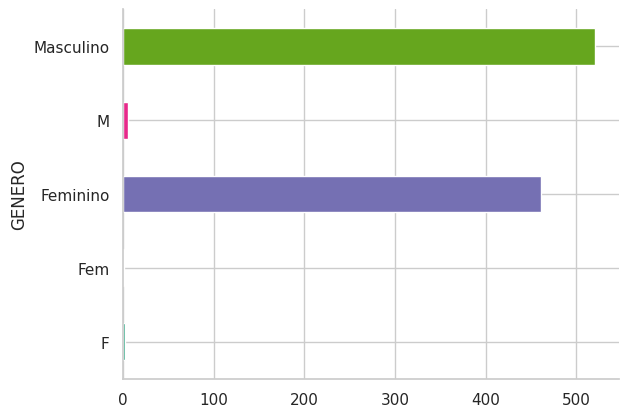

In [49]:
df.groupby('GENERO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Configurar o estilo do gráfico

In [50]:
sns.set(style="whitegrid")

Criar o boxplot

<Axes: xlabel='GENERO', ylabel='IDADE'>

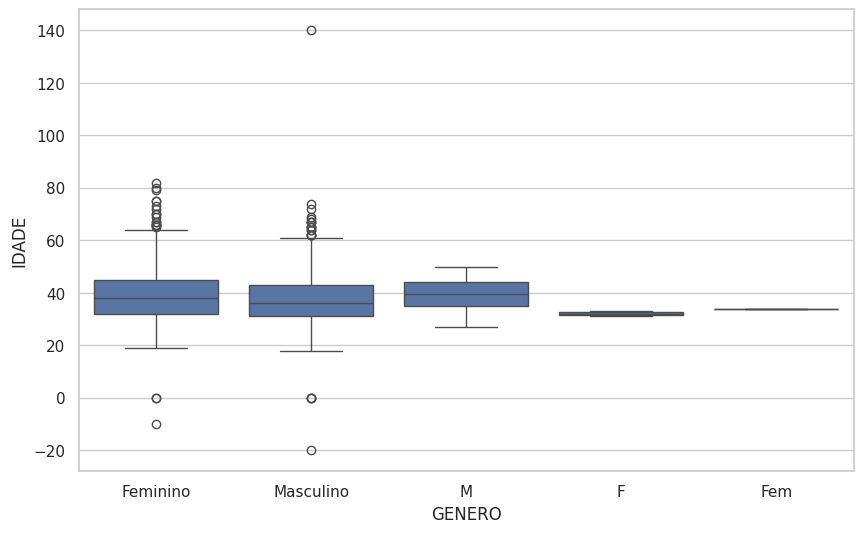

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GENERO', y='IDADE', data=df)

Adicionar título e rótulos

Text(0, 0.5, 'Idade')

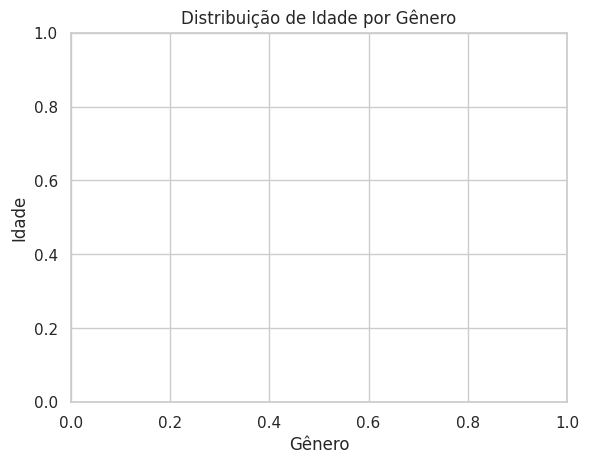

In [52]:
plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')

Mostrar o gráfico

In [53]:
plt.show()

Agrupar dados por gênero e calcular estatísticas de idade

In [54]:
grupo_genero = df.groupby('GENERO')['IDADE'].mean().reset_index()

Criar o gráfico de barras

<BarContainer object of 5 artists>

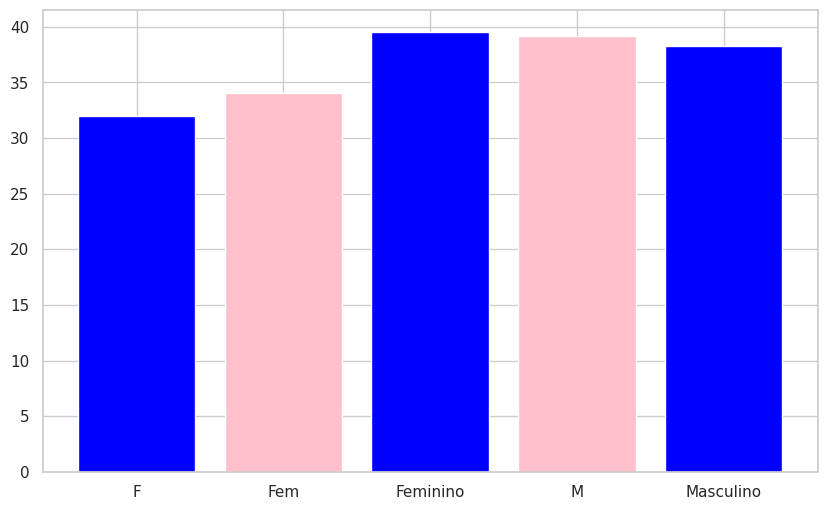

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(grupo_genero['GENERO'], grupo_genero['IDADE'], color=['blue', 'pink'])

Adicionar título e rótulos

Text(0, 0.5, 'Idade Média')

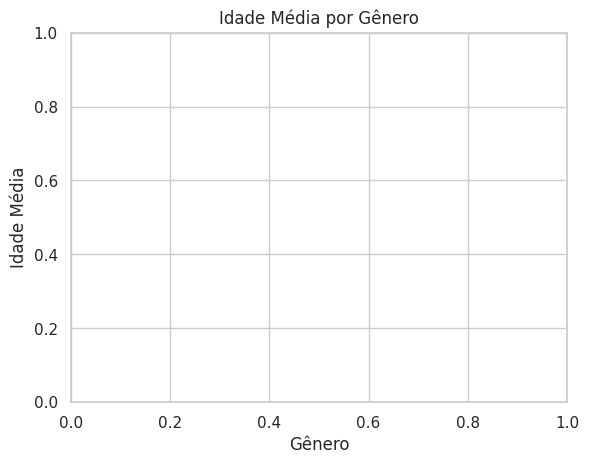

In [56]:
plt.title('Idade Média por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade Média')

Mostrar o gráfico

In [57]:
plt.show()

Agora você pode manipular e trabalhar com seu DataFrame 'df'

In [58]:
df

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619.0,BA,Feminino,42,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2,608.0,CE,Feminino,41,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3,502.0,BA,Feminino,42,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4,699.0,BA,Feminino,39,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5,850.0,CE,Feminino,43,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838.0,CE,Masculino,43,9.0,12310588.0,2.0,1.0,0.0,14576583.0,0.0
995,997,610.0,CE,Masculino,29,9.0,0.0,3.0,0.0,1.0,8391224.0,0.0
996,998,811.0,CE,Masculino,44,3.0,0.0,2.0,0.0,1.0,7843973.0,0.0
997,999,587.0,CE,Masculino,62,7.0,12128627.0,1.0,0.0,1.0,677692.0,0.0


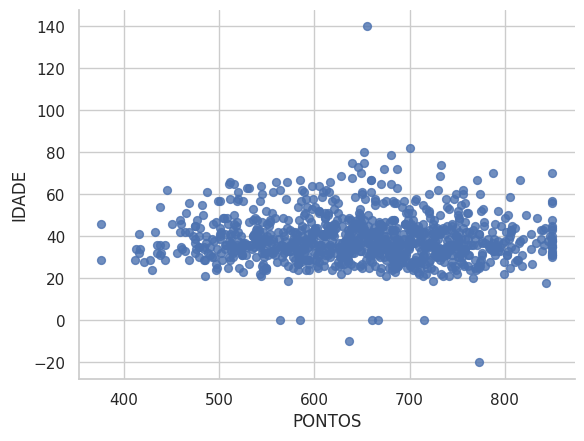

In [61]:
df.plot(kind='scatter', x='PONTOS', y='IDADE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pontos vs Idade

In [64]:
print(df.head())

   ID  PONTOS ESTADO    GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0   1   619.0     BA  Feminino     42   2.0             0.0      1.0   
1   2   608.0     CE  Feminino     41   1.0       8380786.0      1.0   
2   3   502.0     BA  Feminino     42   8.0       1596608.0      3.0   
3   4   699.0     BA  Feminino     39   1.0             0.0      2.0   
4   5   850.0     CE  Feminino     43   2.0      12551082.0      1.0   

   POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0            1.0    1.0  10134888.0   1.0  
1            0.0    1.0  11254258.0   0.0  
2            1.0    0.0  11393157.0   1.0  
3            0.0    0.0   9382663.0   0.0  
4            1.0    1.0    790841.0   0.0  


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              999 non-null    int64  
 1   PONTOS          999 non-null    float64
 2   ESTADO          999 non-null    object 
 3   GENERO          991 non-null    object 
 4   IDADE           999 non-null    int64  
 5   BENS            999 non-null    float64
 6   SALDO NA CONTA  999 non-null    float64
 7   PRODUTO         999 non-null    float64
 8   POSSUI CARTAO   999 non-null    float64
 9   ATIVO           999 non-null    float64
 10  SALARIO         992 non-null    float64
 11  SAIU            999 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 133.8+ KB
None


In [66]:
print(df.describe())

                ID      PONTOS       IDADE        BENS  SALDO NA CONTA  \
count   999.000000  999.000000  999.000000  999.000000    9.990000e+02   
mean    500.916917  648.621622   38.902903    5.069069    7.164928e+06   
std     288.662884   98.264219   11.401912    2.927691    6.311840e+06   
min       1.000000  376.000000  -20.000000    0.000000    0.000000e+00   
25%     251.500000  580.000000   32.000000    2.000000    0.000000e+00   
50%     501.000000  653.000000   37.000000    5.000000    8.958835e+06   
75%     750.500000  721.000000   44.000000    8.000000    1.258684e+07   
max    1000.000000  850.000000  140.000000   10.000000    2.117743e+07   

          PRODUTO  POSSUI CARTAO      ATIVO       SALARIO        SAIU  
count  999.000000     999.000000  999.00000  9.920000e+02  999.000000  
mean     1.526527       0.702703    0.50951  3.528762e+07    0.203203  
std      0.574201       0.457297    0.50016  5.305800e+08    0.402584  
min      1.000000       0.000000    0.00000  

In [67]:
type(df)

pandas.core.frame.DataFrame

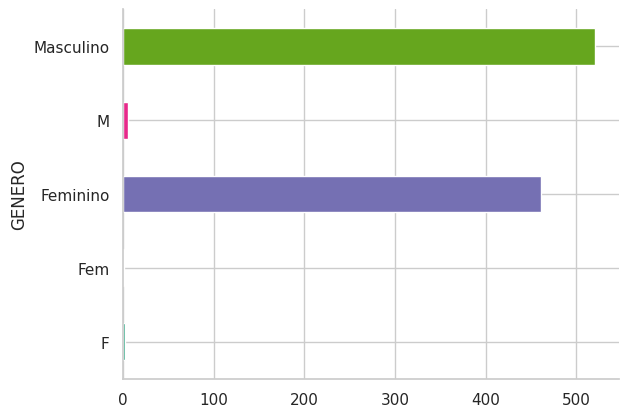

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('GENERO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

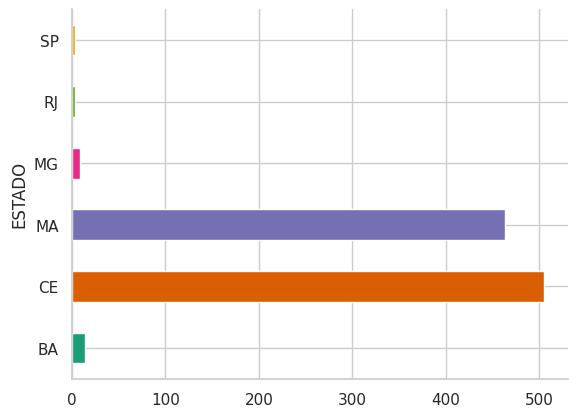

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ESTADO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

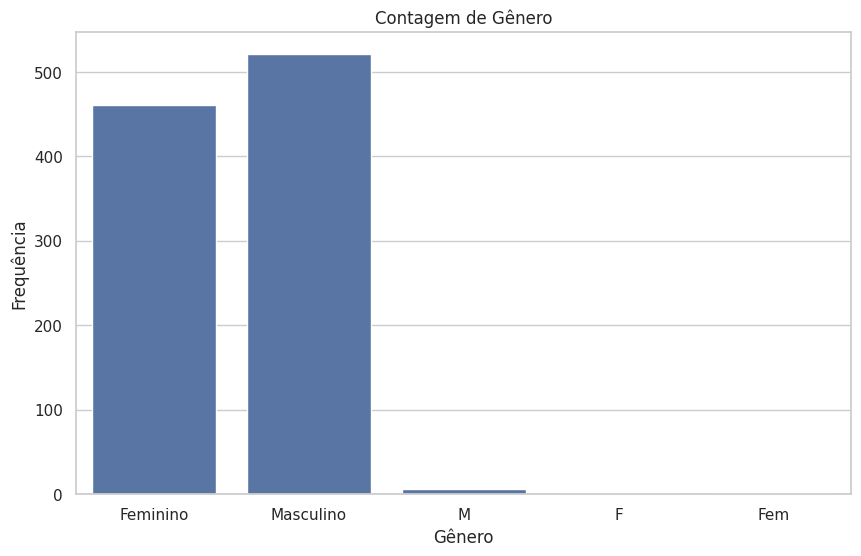

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x='GENERO', data=df)
plt.title('Contagem de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

#2 Corrigir os dados faltantes e preencher as lacunas com valores adequados;

In [74]:
df.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            8
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           7
SAIU              0
dtype: int64

In [75]:
df['GENERO'].value_counts()

GENERO
Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: count, dtype: int64

In [76]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [77]:
moda = df['GENERO'].mode()[0]
df_mode = df.copy()
df_mode['GENERO'] = df_mode['GENERO'].fillna(moda)

In [78]:
moda_genero = df['GENERO'].mode()[0]
moda_genero

'Masculino'

In [79]:
df['GENERO'].fillna(moda_genero, inplace=True)

In [80]:
df.isnull().sum()

ID                0
PONTOS            0
ESTADO            0
GENERO            0
IDADE             0
BENS              0
SALDO NA CONTA    0
PRODUTO           0
POSSUI CARTAO     0
ATIVO             0
SALARIO           0
SAIU              0
dtype: int64

#3 Eliminar os outliers, atribuindo no lugar deles os valores adequados;

In [82]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers



Verificar outliers na coluna 'IDADE'

In [83]:
outliers_idade = identify_outliers_iqr(df, 'IDADE')
print("Outliers na coluna 'IDADE':")
print(outliers_idade)

Outliers na coluna 'IDADE':
      ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
58    59   511.0     CE   Feminino     66   4.0             0.0      1.0   
85    87   652.0     CE   Feminino     75  10.0             0.0      2.0   
104  106   670.0     CE   Feminino     65   1.0             0.0      1.0   
158  160   646.0     MA   Feminino     73   6.0       9725925.0      1.0   
181  183   510.0     MA  Masculino     65   2.0             0.0      2.0   
230  232   673.0     MA  Masculino     72   1.0             0.0      2.0   
234  236   585.0     MA   Feminino     67   5.0      11397897.0      2.0   
243  245   659.0     CE  Masculino     67   6.0       1174116.0      1.0   
252  254   681.0     MA   Feminino     79   0.0             0.0      2.0   
310  312   652.0     MA   Feminino     80   4.0             0.0      2.0   
364  366   640.0     MA  Masculino     68   9.0             0.0      2.0   
371  373   640.0     CE   Feminino     75   1.0      1063079

Identificar outliers usando o método do IQR

In [84]:
Q1 = df['IDADE'].quantile(0.25)
Q3 = df['IDADE'].quantile(0.75)
IQR = Q3 - Q1

Definir limites para identificar outliers

In [85]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

Substituir outliers pela mediana

In [86]:
mediana = df['IDADE'].median()
df['IDADE'] = np.where((df['IDADE'] < limite_inferior) | (df['IDADE'] > limite_superior), mediana, df['IDADE'])

print(df)

       ID  PONTOS ESTADO     GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTO  \
0       1   619.0     BA   Feminino   42.0   2.0             0.0      1.0   
1       2   608.0     CE   Feminino   41.0   1.0       8380786.0      1.0   
2       3   502.0     BA   Feminino   42.0   8.0       1596608.0      3.0   
3       4   699.0     BA   Feminino   39.0   1.0             0.0      2.0   
4       5   850.0     CE   Feminino   43.0   2.0      12551082.0      1.0   
..    ...     ...    ...        ...    ...   ...             ...      ...   
994   996   838.0     CE  Masculino   43.0   9.0      12310588.0      2.0   
995   997   610.0     CE  Masculino   29.0   9.0             0.0      3.0   
996   998   811.0     CE  Masculino   44.0   3.0             0.0      2.0   
997   999   587.0     CE  Masculino   62.0   7.0      12128627.0      1.0   
998  1000   811.0     CE   Feminino   28.0   4.0      16773882.0      2.0   

     POSSUI CARTAO  ATIVO     SALARIO  SAIU  
0              1.0    1.0  10

# Boxplot para visualizar outliers

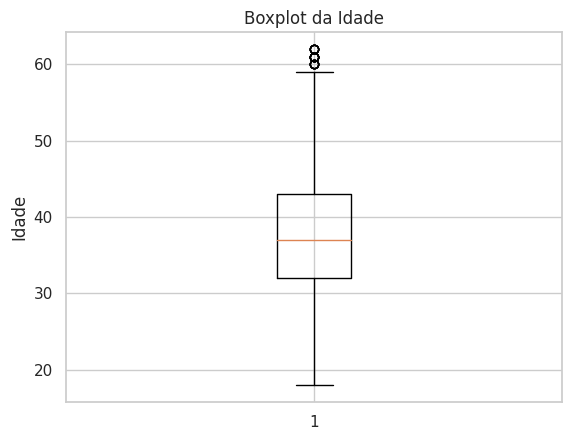

In [87]:
plt.boxplot(df['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

#4 Eliminar os duplicados, para garantir a unicidade das informações;

In [88]:
df.drop_duplicates(subset=['ID', 'GENERO'], inplace=True)

#5 Substituir os NANs por valores adequados;

In [89]:
duplicados = df.duplicated()
duplicados

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 998, dtype: bool

#6 Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino" e "Fem" para "Feminino" para adequá-los ao padrão dos demais

In [90]:
df['GENERO'] = df['GENERO'].replace({'M': 'Masculino', 'F': 'Feminino','Fem':'Feminino'})


# Verificar o resultado

In [91]:
df['GENERO'].value_counts()

GENERO
Masculino    535
Feminino     463
Name: count, dtype: int64